## Assignment 1: Plot of Data of My Choice

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#environmental variable
#create the env variable since previous doesn't work
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [38]:
def zips():
    print ("Downloading")
    if not os.path.isfile(os.getenv("PUIDATA") + "/NTA.zip"):
        print ("no zip in puidata")
        if not os.path.isfile("NTA.zip"):
            print ("no zip in current folder")
            urllib.request.urlretrieve('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile', "NTA.zip")                  

    os.system("mv NTA.zip " + os.getenv("PUIDATA"))
    print ("moving zipped file")
    
    ### unzip the csv 
    os.system("unzip "+ os.getenv("PUIDATA") + "/NTA.zip -d " + os.getenv("PUIDATA"))
    print ("unzipped file")

    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/NTA.zip"):
        print ("WARNING!!! something is wrong: the %s file is not there!" % (x))

    else:
        print ("file in place, you can continue")

In [39]:
zips()

Downloading
no zip in puidata
no zip in current folder
moving zipped file
unzipped file
file in place, you can continue


In [40]:
for file in (os.listdir(os.getenv("PUIDATA"))):
    path = (os.getenv("PUIDATA") + '/')
    if file.endswith("69.dbf"):
        os.rename(path + file, path + 'NTA' + '.dbf')
    if file.endswith("69.prj"):
        os.rename(path + file, path + 'NTA' + '.prj')
    if file.endswith("69.shp"):
        os.rename(path + file, path + 'NTA' + '.shp')
    if file.endswith("69.shx"):
        os.rename(path + file, path + 'NTA' + '.shx')

In [41]:
gdf = gpd.GeoDataFrame.from_file((os.getenv("PUIDATA") + '/NTA.shp'))


In [42]:
gdf.crs = from_epsg(2263)

In [43]:
gdf.crs

{'init': 'epsg:2263', 'no_defs': True}

Text(0.5,1,'NYC Neighborhood Tabulation Areas')

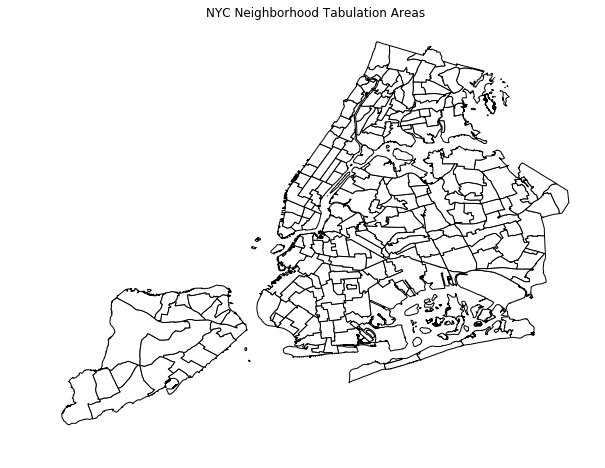

In [44]:
gdf.plot(color="white", edgecolor="black", figsize=(10,10)).axis('off')
pl.title('NYC Neighborhood Tabulation Areas')

In [45]:
gdf.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904861,POLYGON ((-73.80379022888246 40.77561011179248...
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712318,"POLYGON ((-73.86109724335759 40.7636644770869,..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,POLYGON ((-73.75725671509139 40.71813860166257...
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...


In [46]:
gdf['ntacode'].nunique()

195

In [47]:
pupsdf = pd.read_csv('https://data.cityofnewyork.us/resource/5hyw-n69x.csv')

In [48]:
pupsdf.head()

,animalbirth,animalgender,animalname,borough,breedname,censustract2010,citycouncildistrict,communitydistrict,congressionaldistrict,licenseexpireddate,licenseissueddate,nta,rownumber,statesenatorialdistrict,zipcode
0,2000-01-01T00:00:00.000,M,SHADOW,Brooklyn,Beagle,1014.0,46.0,318.0,8.0,2016-01-30T00:00:00.000,2014-12-29T00:00:00.000,BK50,1753,19.0,11236
1,2011-10-01T00:00:00.000,M,ROCCO,Brooklyn,Boxer,756.0,45.0,314.0,9.0,2016-01-30T00:00:00.000,2015-01-07T00:00:00.000,BK43,2415,17.0,11210
2,2005-09-01T00:00:00.000,M,LUIGI,Bronx,Maltese,516.0,13.0,210.0,14.0,2016-02-02T00:00:00.000,2015-01-17T00:00:00.000,BX10,3328,34.0,10464
3,2013-08-01T00:00:00.000,F,PETUNIA,Brooklyn,Pug,419.0,34.0,304.0,7.0,2016-03-28T00:00:00.000,2015-03-01T00:00:00.000,BK78,7537,18.0,11221
4,2008-10-01T00:00:00.000,M,ROMEO,Bronx,Maltese,65.0,17.0,201.0,15.0,2016-03-09T00:00:00.000,2015-03-09T00:00:00.000,BX34,8487,32.0,10451


In [49]:
pupsdf.reset_index(inplace=True)

In [50]:
pupsdf.head()

,index,animalbirth,animalgender,animalname,borough,breedname,censustract2010,citycouncildistrict,communitydistrict,congressionaldistrict,licenseexpireddate,licenseissueddate,nta,rownumber,statesenatorialdistrict,zipcode
0,0,2000-01-01T00:00:00.000,M,SHADOW,Brooklyn,Beagle,1014.0,46.0,318.0,8.0,2016-01-30T00:00:00.000,2014-12-29T00:00:00.000,BK50,1753,19.0,11236
1,1,2011-10-01T00:00:00.000,M,ROCCO,Brooklyn,Boxer,756.0,45.0,314.0,9.0,2016-01-30T00:00:00.000,2015-01-07T00:00:00.000,BK43,2415,17.0,11210
2,2,2005-09-01T00:00:00.000,M,LUIGI,Bronx,Maltese,516.0,13.0,210.0,14.0,2016-02-02T00:00:00.000,2015-01-17T00:00:00.000,BX10,3328,34.0,10464
3,3,2013-08-01T00:00:00.000,F,PETUNIA,Brooklyn,Pug,419.0,34.0,304.0,7.0,2016-03-28T00:00:00.000,2015-03-01T00:00:00.000,BK78,7537,18.0,11221
4,4,2008-10-01T00:00:00.000,M,ROMEO,Bronx,Maltese,65.0,17.0,201.0,15.0,2016-03-09T00:00:00.000,2015-03-09T00:00:00.000,BX34,8487,32.0,10451


In [51]:
pupsdf = pd.DataFrame(pupsdf.groupby(['nta'])['index'].count())

In [52]:
pupsdf.head()

,index
nta,
BK09,7
BK17,5
BK19,3
BK21,4
BK23,3


In [53]:
pupsdf.reset_index(inplace=True)

In [55]:
pupsdf.head()

,nta,index
0,BK09,7
1,BK17,5
2,BK19,3
3,BK21,4
4,BK23,3
